In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imaginglss

In [3]:
decals = imaginglss.DECALS('/project/projectdirs/m779/yfeng1/imaginglss/dr2.conf.py')

In [4]:
import sys
sys.path.insert(0, '/global/homes/y/yfeng1/source/skymapper/s/y/yfeng1/source/skymapper/')

In [5]:
import aea_projection
reload(aea_projection)

<module 'aea_projection' from '/global/u1/y/yfeng1/source/skymapper/aea_projection.pyc'>

In [6]:
import h5py

In [43]:
def overdensity(CAT, RAN, nside=32):
    ra = CAT['FLUXES']['RA']
    dec = CAT['FLUXES']['DEC'] 
    veto = CAT['TYCHOVETO']['BOSS_DR9'][:]
    conf = CAT['CONFIDENCE']['DECAM_CONFIDENCE'][:, 1] > 5
    conf &= CAT['CONFIDENCE']['DECAM_CONFIDENCE'][:, 2] > 5
    conf &= CAT['CONFIDENCE']['DECAM_CONFIDENCE'][:, 4] > 3
    
    n_obj = aea_projection.histogrammap(ra[~veto & conf], dec[~veto & conf], perarea=True, nside=nside)
    
    ra = RAN['NOISES']['RA']
    dec = RAN['NOISES']['DEC'] 
    veto = RAN['TYCHOVETO']['BOSS_DR9'][:]
    fc = RAN['FC']['FRACTION_COMPLETENESS'][:]
    print fc.min(), fc.max()
    n_ran, n_ran_full = aea_projection.histogrammap(ra[~veto], dec[~veto], weights=fc[~veto], perarea=True, nside=nside)
    meanfc = n_ran / n_ran_full
    norm = (1.0 * n_ran[meanfc > 0.95] / n_obj[meanfc > 0.95]).mean()
    print 'complete pixels ', (meanfc > 0.95).sum()
    return 1.0 * n_obj / n_ran * norm - 1.0, meanfc

In [44]:
FQSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/QSO.hdf5')
FQSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/RANDOM-QSO.hdf5')
dQSO, fQSO = overdensity(FQSO, FQSOR)

0.0 1.0
complete pixels  70


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


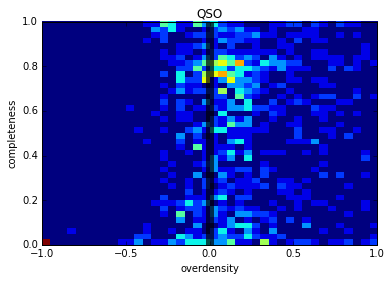

In [58]:
_ = hist2d(dQSO, fQSO, range=((-1, 1), (0, 1)), bins=(40, 40))
axvline(0.0, lw=8, alpha=0.7, color='k')
title('QSO')
xlabel('overdensity')
ylabel('completeness')

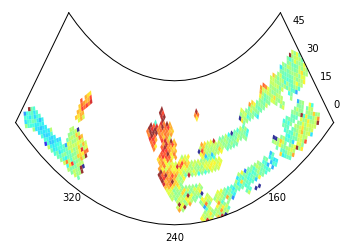

In [83]:

ax = subplot(111, projection='aea')
ax.set_xlim(110, 370)
ax.set_ylim(-10, 50)
ax.mapshow(dQSO, mask=~isnan(dQSO), vmin=-1, vmax=1)


In [48]:
FELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/ELG.hdf5')
FELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/RANDOM-ELG.hdf5')
dELG, fELG = overdensity(FELG, FELGR)

0.0 1.0
complete pixels  60


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


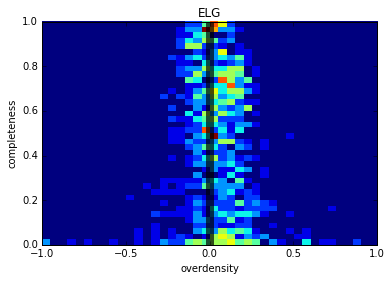

In [59]:
_ = hist2d(dELG, fELG, range=((-1, 1), (0, 1)), bins=(40, 40))
axvline(0.0, lw=8, alpha=0.7, color='k')
title('ELG')
xlabel('overdensity')
ylabel('completeness')

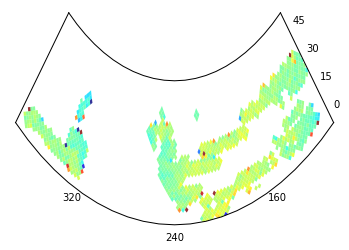

In [85]:

ax = subplot(111, projection='aea')
ax.set_xlim(110, 370)
ax.set_ylim(-10, 50)
ax.mapshow(dELG, mask=~isnan(dELG), vmin=-1, vmax=1)


In [8]:
FLRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LRG.hdf5')
FLRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/RANDOM-LRG.hdf5')
dLRG= overdensity(FLRG, FLRGR)

0.0 0.0
complete pixels  0


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


In [23]:
from imaginglss.analysis.completeness import CompletenessEstimator

In [42]:
#ce = CompletenessEstimator(decals.datarelease, 'LRG', FLRG['FLUXES']['DECAM_INTRINSIC_FLUX'], FLRG['NOISES']['DECAM_INTRINSIC_NOISE_LEVEL'])
ce = estimator(decals.datarelease, 'LRG', FLRG['FLUXES']['DECAM_INTRINSIC_FLUX'], FLRG['NOISES']['DECAM_INTRINSIC_NOISE_LEVEL'])

[[  1.09498644   8.41865349]
 [  2.58629775  12.03042507]
 [  1.8349005    7.71048403]
 ..., 
 [  2.12941599   8.80531883]
 [  4.06551361  16.67384338]
 [  1.67974019  10.3500824 ]]
[ 0.00687052  6.54636526]
[[ 0.26595405  0.38050112]
 [ 0.26599541  0.38053423]
 [ 0.21293215  0.23804036]
 ..., 
 [ 0.48517424  0.29129556]
 [ 0.48169896  0.36944503]
 [ 0.48208132  0.37623015]]
0


In [25]:
fc = ce(FLRG['NOISES']['DECAM_INTRINSIC_NOISE_LEVEL'])

In [28]:
from imaginglss.analysis import targetselection

In [29]:
targetselection.LRG.bands

'rz'

In [41]:
def estimator(datarelease, objecttype, fluxes, noises, confidence={'r': 5.0, 'g': 5.0, 'z': 3.0}):
    # we use the integrator in kdcount for the estimator
    from kdcount import KDTree

    # the targetselection type knows which bands are useful
    # we only put limits on those bands.
    #
    # FIXME: @ekitanidis what about adding a link to your talk slides 
    # explaining this?

    fluxcut = getattr(targetselection, objecttype)

    fluxes = np.array([
        fluxes[:, datarelease.bands[band]]
        for band in fluxcut.bands]).T
    print fluxes
    noises = np.array([
        confidence[band] * noises[:, datarelease.bands[band]]
        for band in fluxcut.bands]).T

    # This will be the 100% completeness limit for the given confidence
    lim = fluxes.min(axis=0)
    print lim
    print noises
    mask = (noises <= lim).all(axis=-1)
    print mask.sum()
    model = fluxes[mask]
    tree = KDTree(model)
    root = tree.root

    def fcmodelfunc(noises):
        noises = np.array([
            confidence[band] * noises[:, datarelease.bands[band]]
            for band in fluxcut.bands]).T
        seen = root.integrate(noises, np.inf)
        mask = (noises <= lim).all(axis=-1)

        # Watchout:
        # Only 100% complete area has fcomp == 1.0
        # otherwise we give a completeness slightly less than 1.0

        fcomp = 1.0 * seen / (len(model) + 1.0)
        fcomp[mask] = 1.0
        return fcomp

    return fcmodelfunc


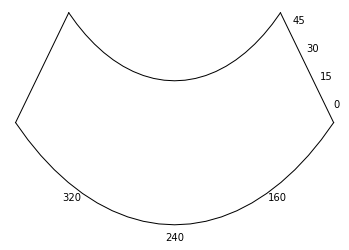

In [87]:

ax = subplot(111, projection='aea')
ax.set_xlim(110, 370)
ax.set_ylim(-10, 50)
ax.mapshow(dLRG, mask=~isnan(dLRG), vmin=-1, vmax=1)
